In [68]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [69]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [70]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Item_Code', String),
        ('OutOfHome_Consumption_Quantity', Float64),
        ('OutOfHome_Consumption_Value', Float64),
        ('Total_Consumption_Quantity', Float64),
        ('Total_Consumption_Value', Float64),
        ('Source', String),
        ('Multiplier', Int64)])

In [71]:
cols = [
    'State',
    'Item_Code',
    'OutOfHome_Consumption_Value',
    'OutOfHome_Consumption_Quantity',
    'Total_Consumption_Quantity',
    'Total_Consumption_Value',
]

pdf = pdf [cols]


In [72]:

pdf = pdf.filter(
    pl.col('State') == '23'
)

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

'Desire Filter shape (1355664, 6)'

In [73]:
print(f"Number of unique Item code present {pdf['Item_Code'].n_unique()}")

Number of unique Item code present 141


In [74]:
pdf.estimated_size(unit='mb')

16.156936645507812

In [75]:
pdf.columns

['State',
 'Item_Code',
 'OutOfHome_Consumption_Value',
 'OutOfHome_Consumption_Quantity',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value']

In [78]:
pdf.estimated_size(unit='mb')

16.156936645507812

In [80]:
df = pdf.to_pandas()

# Functions

In [ ]:
def plot_graph(col: str):
    # Create figure and axes with proper size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Bar plot
    sns.barplot(df[col], orient='h', ax=ax1)
    ax1.set_title(f"{col} Count")

    # KDE plot
    sns.kdeplot(df[col], ax=ax2)
    ax2.set_title(f"{col} Frequency")

    plt.tight_layout()
    plt.show()

In [ ]:
def auto_label_and_plot(col_name: str, map_dictionary: dict):
    # Map the codes to labels
    df[col_name] = df['Item_Code'].map(map_dictionary)
    
    # Group the data
    dataframe = df.groupby(col_name)[[
        'OutOfHome_Consumption_Value',
        'OutOfHome_Consumption_Quantity',
        'Total_Consumption_Quantity',
        'Total_Consumption_Value'
    ]].count()
    
    # Display summary
    display(dataframe.T)
    display(dataframe.describe().T)
    
    # Plot each column if plot_graph() exists
    for col in dataframe.columns:
        plot_graph(col) 

In [ ]:

# Mapping dictionary (outside the function)
salt_sugar_mapping = {
    73: "salt – free",
    74: "sugar – free",
    178: "salt – PDS",
    170: "salt – other sources",
    171: "sugar – PDS",
    172: "sugar – other sources",
    173: "jaggery (gur)",
    174: "candy/misri",
    175: "honey",
    179: "salt & sugar: sub-total"
}

# Run the function
auto_label_and_plot(col_name='salt_sugar', map_dictionary=salt_sugar_mapping)


In [81]:
category_mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food"
}

# Add a new column for labels
df['Category'] = df['Item_Code'].map(category_mapping)

df


,State,Item_Code,OutOfHome_Consumption_Value,OutOfHome_Consumption_Quantity,Total_Consumption_Quantity,Total_Consumption_Value,Category
0,23,4,NaN,NaN,0.0,200.0,NaN
1,23,61,NaN,NaN,15.0,NaN,NaN
2,23,62,NaN,NaN,14.0,NaN,NaN
3,23,103,NaN,NaN,1.0,75.0,NaN
4,23,105,NaN,NaN,0.0,15.0,NaN
...,...,...,...,...,...,...,...
1355659,23,219,NaN,NaN,NaN,237.0,vegetables
1355660,23,239,NaN,NaN,NaN,60.0,fruits (fresh)
1355661,23,249,NaN,NaN,0.0,14.0,fruits (dry)
1355662,23,269,NaN,NaN,415.0,129.0,spices


# Category

In [122]:
category_df = df.groupby(df['Category'])[['OutOfHome_Consumption_Value',
 'OutOfHome_Consumption_Quantity',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value']].count()


category_df.T

Category,beverages,cereal substitute,cereals,edible oil,"egg, fish & meat",fruits (dry),fruits (fresh),milk & milk products,pulses & products,salt & sugar,spices,vegetables
OutOfHome_Consumption_Value,0,0,10460,698,318,426,1110,6974,4252,16,1600,4038
OutOfHome_Consumption_Quantity,0,0,10460,698,0,426,0,0,4252,16,1600,0
Total_Consumption_Quantity,0,6064,27890,27932,0,23794,0,0,27944,28004,27926,0
Total_Consumption_Value,28052,6064,27838,27932,14530,23794,27234,27648,27944,28004,27926,27934


In [124]:
category_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,2491.000000,3337.587752,0.0,242.5,904.0,4091.5,10460.0
OutOfHome_Consumption_Quantity,12.0,1454.333333,3094.555551,0.0,0.0,8.0,923.5,10460.0
Total_Consumption_Quantity,12.0,14129.500000,13850.548532,0.0,0.0,14929.0,27927.5,28004.0
Total_Consumption_Value,12.0,24575.000000,7008.495805,6064.0,26374.0,27882.0,27936.5,28052.0


<Axes: xlabel='Total_Consumption_Quantity', ylabel='Category'>

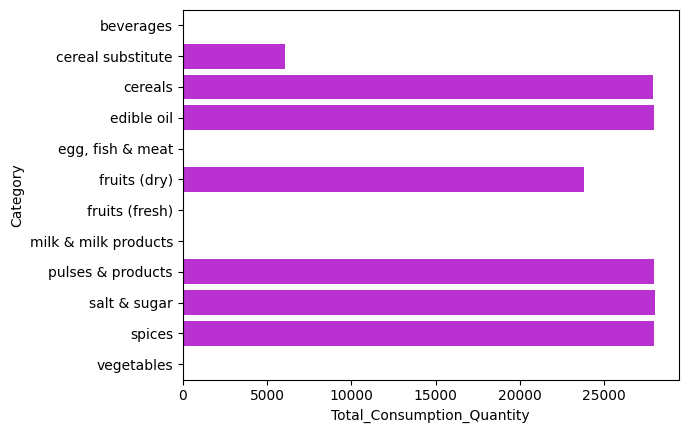

In [91]:
sns.barplot(category_df['Total_Consumption_Quantity'], orient='h')

# Functions

In [119]:
def plot_graph(col: str):
    # Create figure and axes with proper size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Bar plot
    sns.barplot(category_df[col], orient='h', ax=ax1)
    ax1.set_title(f"{col} Count")

    # KDE plot
    sns.kdeplot(category_df[col], ax=ax2)
    ax2.set_title(f"{col} Frequency")

    plt.tight_layout()
    plt.show()

# Category all graphs

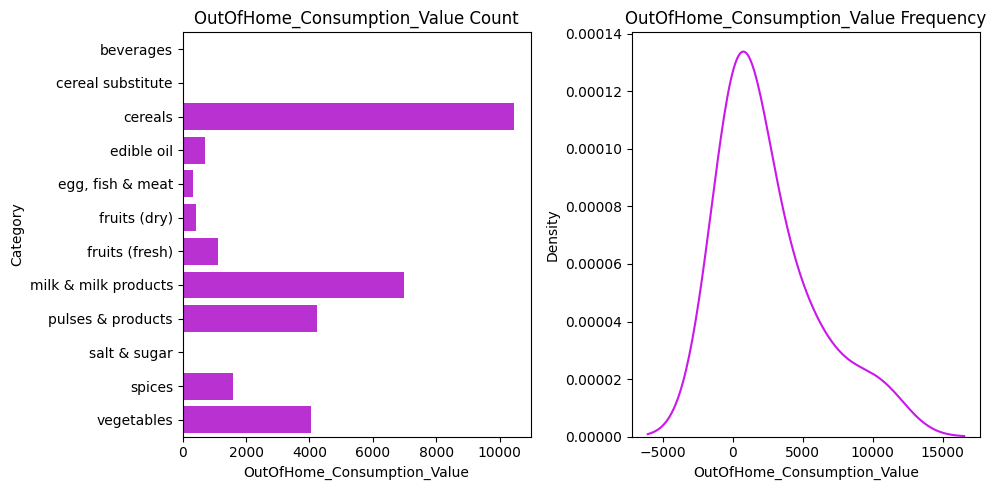

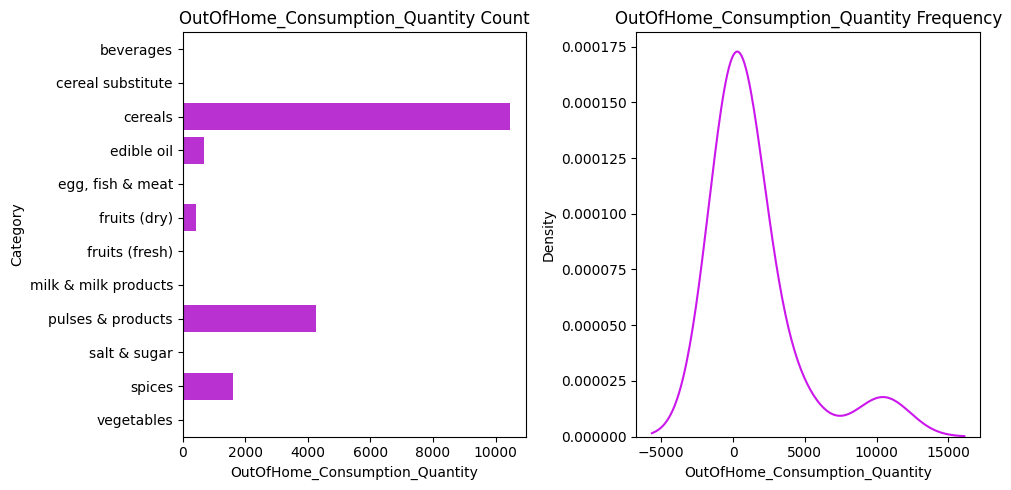

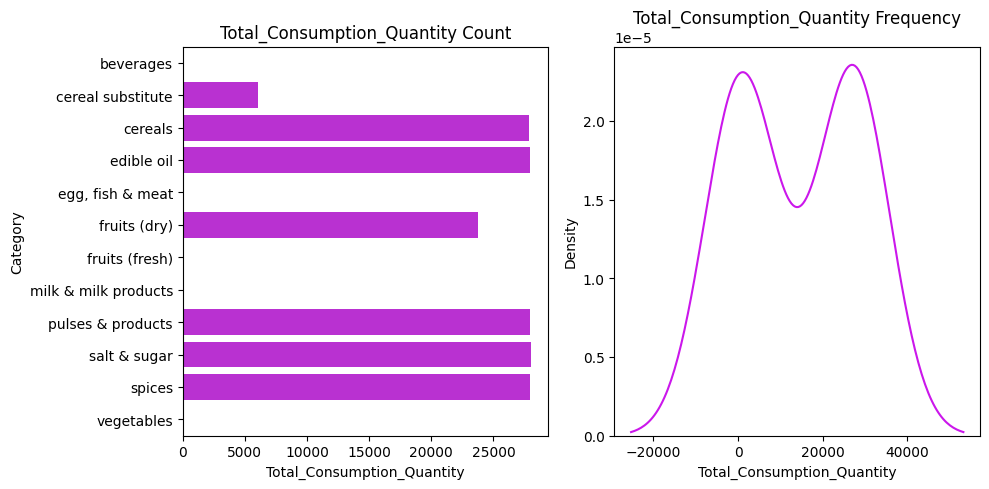

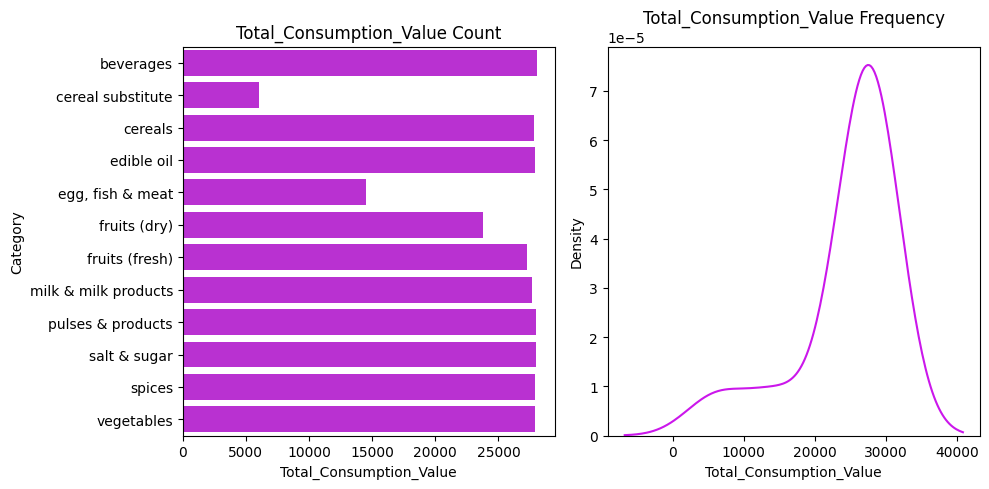

In [121]:
for col in category_df.columns:
    plot_graph(col)

# Cereals 

In [128]:
cereal_mapping = {
    61: "rice-free",
    62: "wheat/atta-free",
    70: "coarse grains-free",
    101: "rice – PDS",
    102: "rice – other sources",
    103: "chira",
    105: "muri",
    106: "other rice products (khoi/lawa, etc.)",
    107: "wheat/atta – PDS",
    108: "wheat/atta – other sources",
    110: "maida",
    111: "suji/rawa",
    112: "vermicelli (sewai)",
    114: "other wheat products",
    1: "coarse grains – PDS",
    2: "coarse grains – other sources",
    122: "other cereals & products",
    129: "cereals: sub-total",
    139: "cereal substitutes (tapioca, etc.)"
}

df['Category_cereals'] =  df['Item_Code'].map(cereal_mapping)

df

,State,Item_Code,OutOfHome_Consumption_Value,OutOfHome_Consumption_Quantity,Total_Consumption_Quantity,Total_Consumption_Value,Category,Category_cereals
0,23,4,NaN,NaN,0.0,200.0,NaN,NaN
1,23,61,NaN,NaN,15.0,NaN,NaN,rice-free
2,23,62,NaN,NaN,14.0,NaN,NaN,wheat/atta-free
3,23,103,NaN,NaN,1.0,75.0,NaN,chira
4,23,105,NaN,NaN,0.0,15.0,NaN,muri
...,...,...,...,...,...,...,...,...
1355659,23,219,NaN,NaN,NaN,237.0,vegetables,NaN
1355660,23,239,NaN,NaN,NaN,60.0,fruits (fresh),NaN
1355661,23,249,NaN,NaN,0.0,14.0,fruits (dry),NaN
1355662,23,269,NaN,NaN,415.0,129.0,spices,NaN


In [129]:
df.columns

Index(['State', 'Item_Code', 'OutOfHome_Consumption_Value',
       'OutOfHome_Consumption_Quantity', 'Total_Consumption_Quantity',
       'Total_Consumption_Value', 'Category', 'Category_cereals'],
      dtype='object')

In [131]:
Category_cereals_df = df.groupby(df['Category_cereals'])[['OutOfHome_Consumption_Value',
 'OutOfHome_Consumption_Quantity',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value']].count()


category_df.T

Category,beverages,cereal substitute,cereals,edible oil,"egg, fish & meat",fruits (dry),fruits (fresh),milk & milk products,pulses & products,salt & sugar,spices,vegetables
OutOfHome_Consumption_Value,0,0,10460,698,318,426,1110,6974,4252,16,1600,4038
OutOfHome_Consumption_Quantity,0,0,10460,698,0,426,0,0,4252,16,1600,0
Total_Consumption_Quantity,0,6064,27890,27932,0,23794,0,0,27944,28004,27926,0
Total_Consumption_Value,28052,6064,27838,27932,14530,23794,27234,27648,27944,28004,27926,27934


In [133]:
category_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,2491.000000,3337.587752,0.0,242.5,904.0,4091.5,10460.0
OutOfHome_Consumption_Quantity,12.0,1454.333333,3094.555551,0.0,0.0,8.0,923.5,10460.0
Total_Consumption_Quantity,12.0,14129.500000,13850.548532,0.0,0.0,14929.0,27927.5,28004.0
Total_Consumption_Value,12.0,24575.000000,7008.495805,6064.0,26374.0,27882.0,27936.5,28052.0


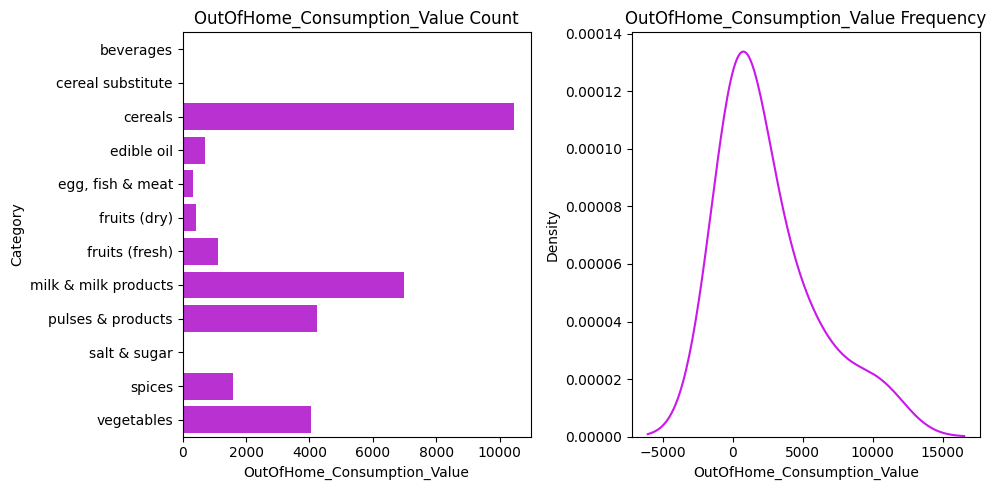

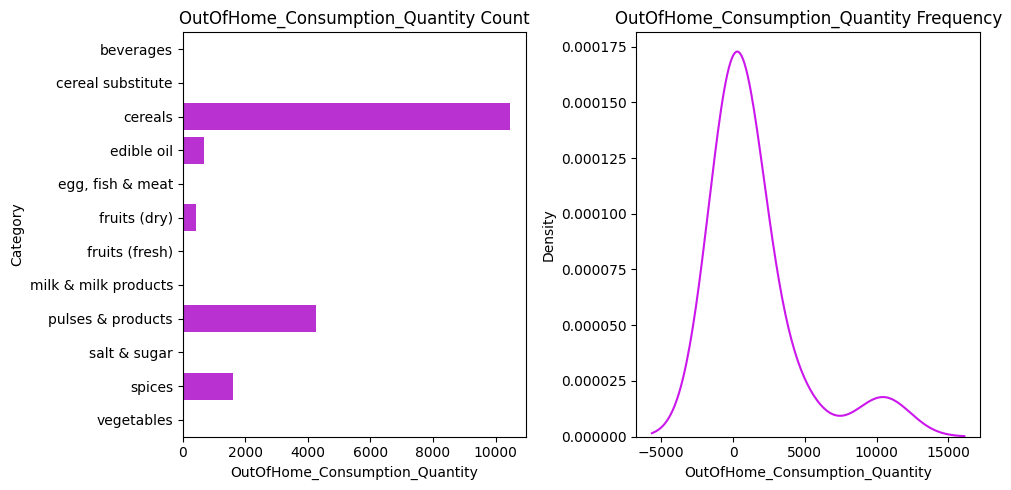

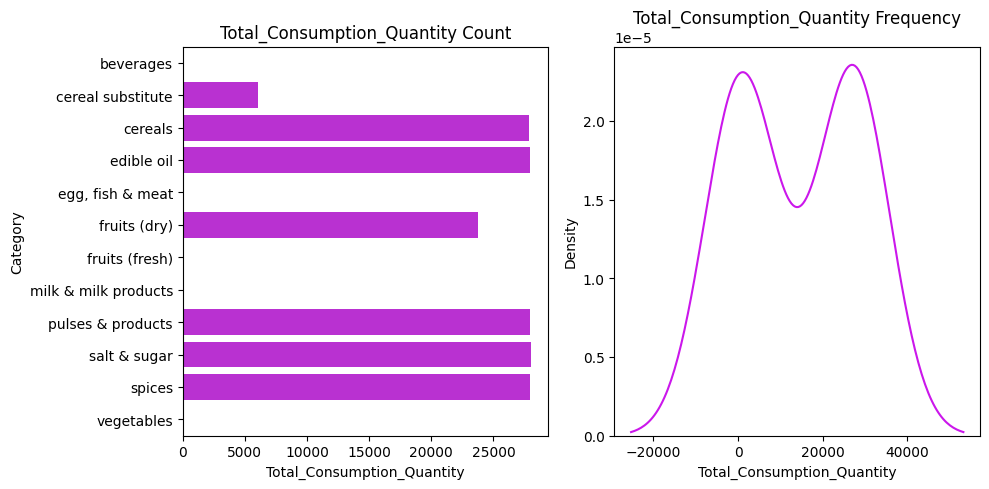

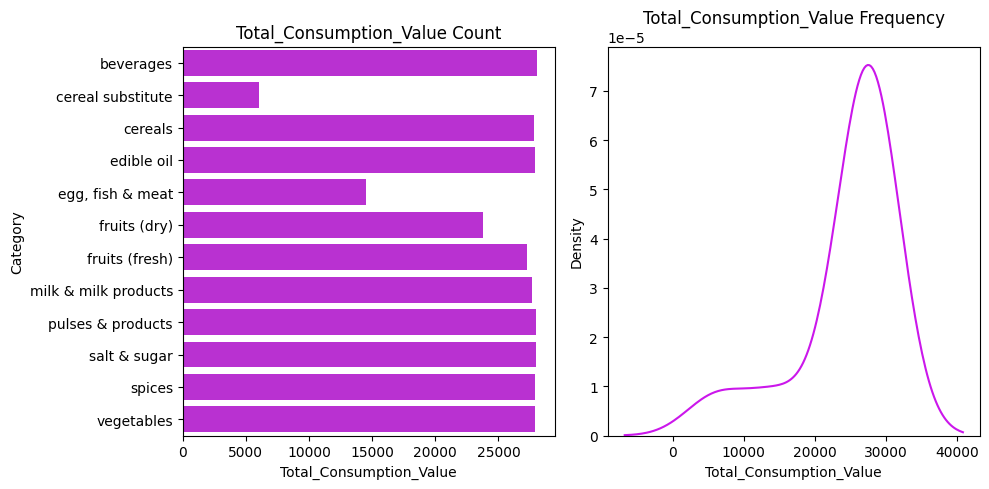

In [135]:
for col in category_df.columns:
    plot_graph(col)

# Pulses & Products

In [136]:
pulses_mapping = {
    140: "arhar/tur",
    141: "gram: split",
    142: "gram: whole",
    143: "moong",
    144: "masur",
    145: "urd",
    146: "peas/chickpeas",
    148: "other pulses (khesari, etc.)",
    150: "besan/gram products",
    152: "other pulse products (soya chunks, etc.)",
    158: "pulses – PDS",
    71: "pulses – free",
    72: "gram – free",
    159: "pulses & pulse products: sub-total"
}

df['category_pulses'] = df['Item_Code'].map(pulses_mapping)

In [138]:
category_pulses_df = df.groupby(df['category_pulses'])[['OutOfHome_Consumption_Value',
 'OutOfHome_Consumption_Quantity',
 'Total_Consumption_Quantity',
 'Total_Consumption_Value']].count()

category_pulses_df.T

category_pulses,arhar/tur,besan/gram products,gram – free,gram: split,gram: whole,masur,moong,"other pulse products (soya chunks, etc.)","other pulses (khesari, etc.)",peas/chickpeas,pulses & pulse products: sub-total,urd
OutOfHome_Consumption_Value,1646,0,0,1518,1292,594,1088,0,80,274,4252,728
OutOfHome_Consumption_Quantity,1646,0,0,1518,1292,594,1088,0,80,274,4252,728
Total_Consumption_Quantity,26608,17810,2,12830,6272,10798,21136,5102,800,2326,27944,10016
Total_Consumption_Value,26608,17810,0,12830,6272,10798,21136,5102,800,2326,27944,10016


In [139]:
category_pulses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OutOfHome_Consumption_Value,12.0,956.000000,1203.903349,0.0,60.0,661.0,1348.5,4252.0
OutOfHome_Consumption_Quantity,12.0,956.000000,1203.903349,0.0,60.0,661.0,1348.5,4252.0
Total_Consumption_Quantity,12.0,11803.666667,9694.447627,2.0,4408.0,10407.0,18641.5,27944.0
Total_Consumption_Value,12.0,11803.500000,9694.668980,0.0,4408.0,10407.0,18641.5,27944.0


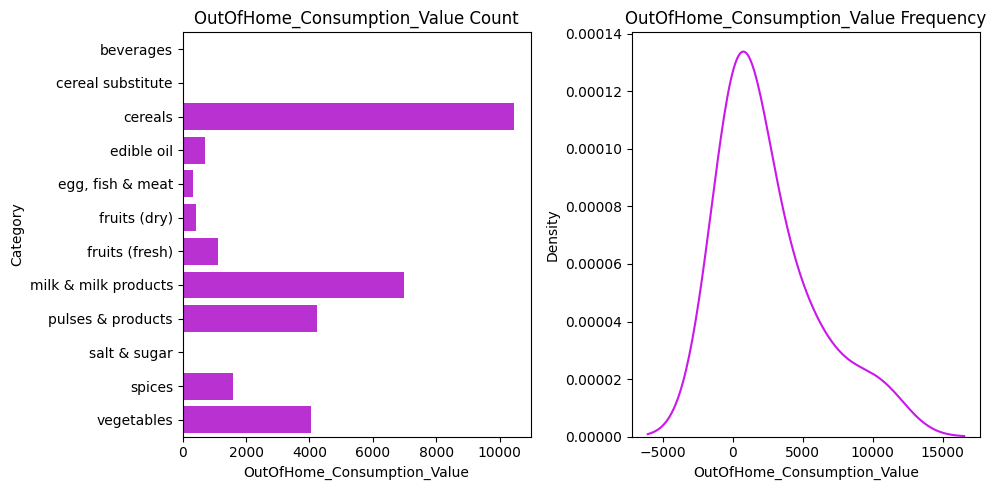

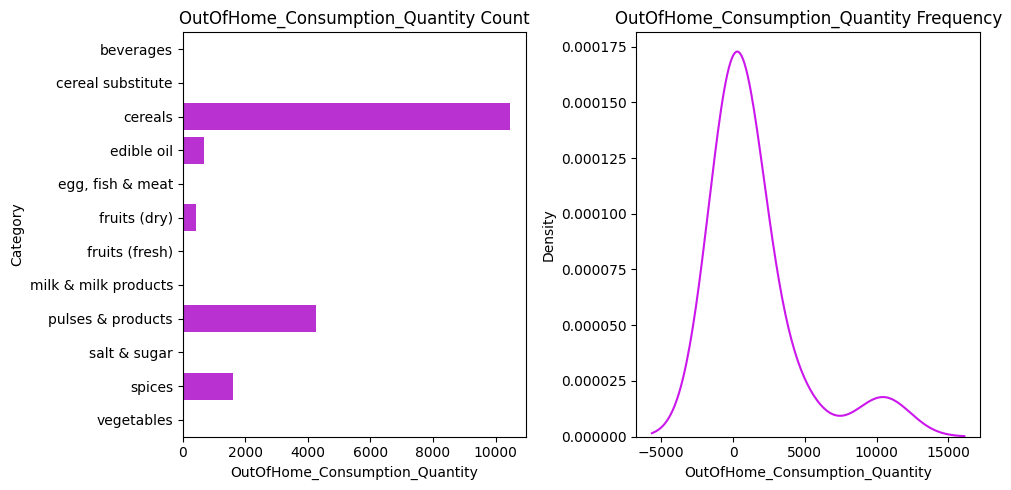

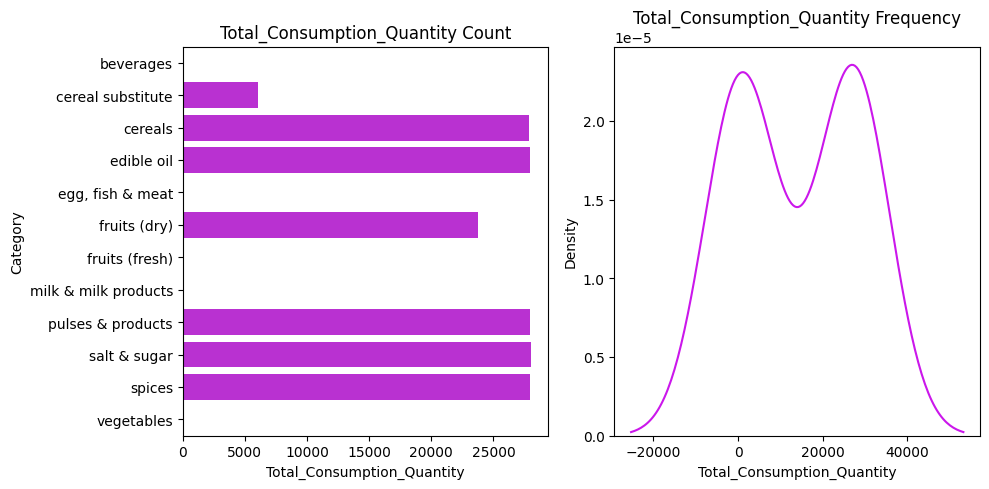

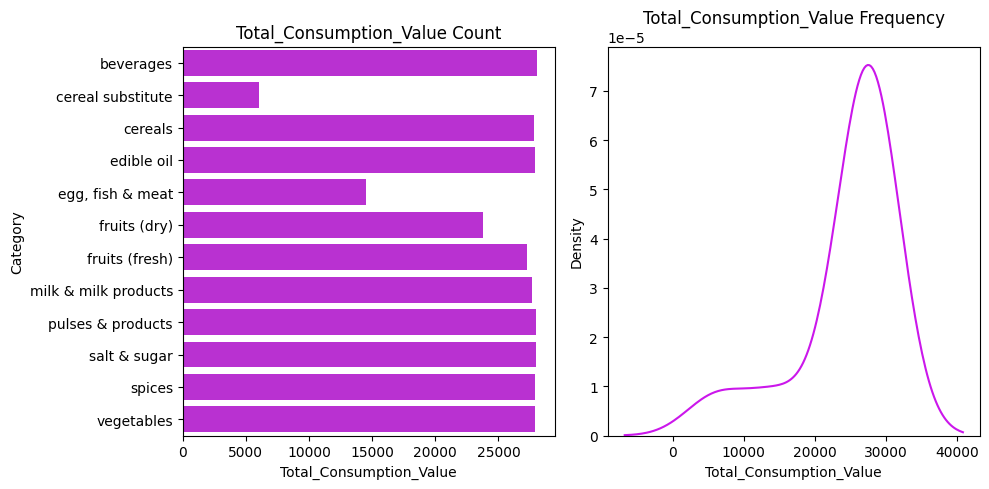

In [142]:
for col in category_pulses_df.columns:
    plot_graph(col)

# Salt & Sugar

In [143]:
salt_sugar_mapping = {
    73: "salt – free",
    74: "sugar – free",
    178: "salt – PDS",
    170: "salt – other sources",
    171: "sugar – PDS",
    172: "sugar – other sources",
    173: "jaggery (gur)",
    174: "candy/misri",
    175: "honey",
    179: "salt & sugar: sub-total"
}

df['category_salt_sugar'] = df['Item_Code'].map(salt_sugar_mapping)



In [ ]:
category_salt_sugar_df = df.groupby()

In [144]:
def auto_label_and_plot(col_name:str, map_dictionary:dict):
    df[col_name] = df['Item_Code'].map(map_dictionary)
    
    dataframe = f"{col}_df"
    dataframe = df.groupby(col_name)[['OutOfHome_Consumption_Value',
                                        'OutOfHome_Consumption_Quantity',
                                        'Total_Consumption_Quantity',
                                        'Total_Consumption_Value']].count()
    display(dataframe.T)
    display(dataframe.describe().T)
    
    for col in dataframe.columns:
        plot_graph(col)
    

In [ ]:
def auto_label_and_plot(col_name: str, map_dictionary: dict):
    # Map the codes to labels
    df[col_name] = df['Item_Code'].map(map_dictionary)
    
    dataframe_name = f"{col}_df"
    # Group the data
    dataframe_name = df.groupby(col_name)[[
        'OutOfHome_Consumption_Value',
        'OutOfHome_Consumption_Quantity',
        'Total_Consumption_Quantity',
        'Total_Consumption_Value'
    ]].count()
    
    # Display summary
    display(dataframe_name.T)
    display(dataframe_name.describe().T)
    
    for col in dataframe_name.columns:
        plot_graph(col)  



In [148]:
df.columns

Index(['State', 'Item_Code', 'OutOfHome_Consumption_Value',
       'OutOfHome_Consumption_Quantity', 'Total_Consumption_Quantity',
       'Total_Consumption_Value', 'Category', 'Category_cereals',
       'category_pulses', 'category_salt_sugar', 'salt_sugar'],
      dtype='object')

In [150]:

# Mapping dictionary (outside the function)
salt_sugar_mapping = {
    73: "salt – free",
    74: "sugar – free",
    178: "salt – PDS",
    170: "salt – other sources",
    171: "sugar – PDS",
    172: "sugar – other sources",
    173: "jaggery (gur)",
    174: "candy/misri",
    175: "honey",
    179: "salt & sugar: sub-total"
}

# Run the function
auto_label_and_plot(col_name='salt_sugar', map_dictionary=salt_sugar_mapping)


UnboundLocalError: cannot access local variable 'col' where it is not associated with a value